#Importando biblitecas necessárias e dataset

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, train

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, plot_confusion_matrix, plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

Importando o dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/slot 6/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

Verificando a quantidade de valores nulos no dataset

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# o Dataset não apresenta nenhum valor nulo

Entendendo o Dataset


* age - age in years
* sex - 1: male, 0: female
* cp - chest pain type, 1 to 4
  * 0: Typical angina: chest pain related decrease blood supply to the heart
  * 1: Atypical angina: chest pain not related to heart
  * 2: Non-anginal pain: typically esophageal spasms (non heart related)
  * 3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure
* chol - serum cholestoral in mg/dl
* fbs - fasting blood sugar (> 120 mg/dl) 1:True, 0:False
* restecg - resting electrocardiographic results (values 0,1,2)
* thalach - maximum heart rate achieved
* exang - exercise induced angina
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal -  thalium stress result, 
3 = normal; 6 = fixed defect; 7 = reversable defect

# EXPLORATORY DATA ANALYSIS (EDA)

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


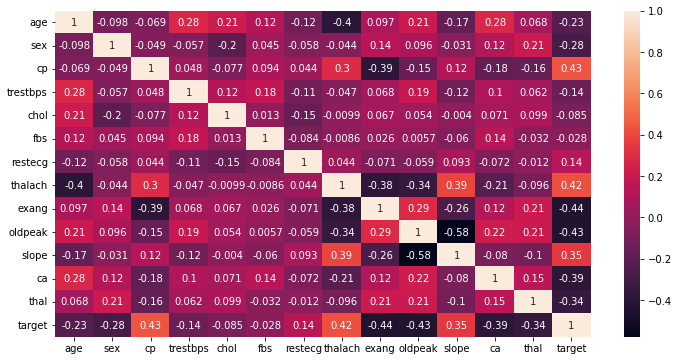

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

**Analisando a variável TARGET**

In [10]:
y = df['target']
y.value_counts()

1    165
0    138
Name: target, dtype: int64

**Verificando os outliers**

In [11]:
from scipy import stats
out_cols=['age','trestbps', 'chol','thalach','oldpeak'] #colunas com variáveis contínuas

for col in out_cols:
    z=np.abs(stats.zscore(df[col]))
    print(col, df[z>3].shape[0])

age 0
trestbps 2
chol 4
thalach 1
oldpeak 2


In [12]:
# Durante o EDA, esse estudo de outlier será aprofundado

In [13]:
df.describe(percentiles=[0.01,0.1,0.25,0.50,0.75,0.90,0.99])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,35.000000,0.000000,0.000000,100.000000,149.000000,0.000000,0.000000,95.020000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
10%,42.000000,0.000000,0.000000,110.000000,188.000000,0.000000,0.000000,116.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
90%,66.000000,1.000000,2.000000,152.000000,308.800000,1.000000,1.000000,176.600000,1.000000,2.800000,2.000000,2.000000,3.000000,1.000000


**AGE**

Text(0.5, 1.0, 'distruibuição da Idade')

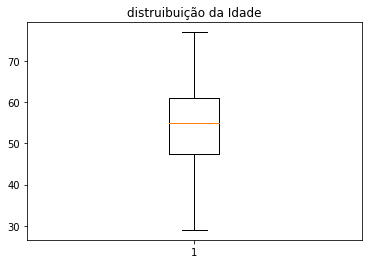

In [14]:
plt.boxplot(df['age'])
plt.title('distruibuição da Idade')

In [15]:
#observamos uma variável discreta com a distruibuição conforme boxplot acima. 

**SEX**

Text(0.5, 1.0, 'Sex')

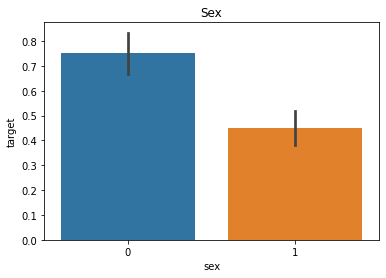

In [16]:
sns.barplot(df['sex'], y)
plt.title('Sex')

In [17]:
#podemos observar que mulheres apresentam uma maior tendência para desenvolver doenças no coração

**cp - chest pain type**



In [18]:
df['cp'].unique()

array([3, 2, 1, 0])

Text(0.5, 1.0, 'chest pain type')

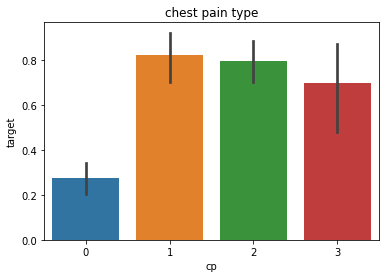

In [19]:
sns.barplot(df['cp'], y)
plt.title('chest pain type')

In [20]:
# Observa-se que, o caso típico de angina é o que menos contribui para possíveis problemas no coração

**trestbps - resting blood pressure**

Text(0.5, 1.0, 'trestbps')

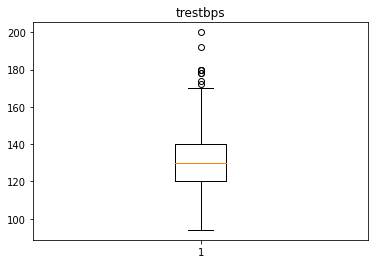

In [21]:
plt.boxplot(df['trestbps'])
plt.title('trestbps')

In [22]:
Q1=df['trestbps'].quantile(0.25)
Q3=df['trestbps'].quantile(0.75)
IQR=Q3-Q1
print("Q1", Q1)
print("Q3", Q3)
print("IQR", IQR)
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Normal Range", lower_bound, "-", upper_bound)

Q1 120.0
Q3 140.0
IQR 20.0
Normal Range 90.0 - 170.0


In [23]:
#estudo dos outliers
z=np.abs(stats.zscore(df['trestbps']))
lista = list(filter(lambda x: x > 3, list(z)))
lista

[3.9051654719061446, 3.4482622426417127]

In [24]:
#pelo z-score, apresentamos somente 2 outliers, conforme mostrado anteriormente

**chol - serum cholestoral in mg/dl**

Text(0.5, 1.0, 'serum cholestoral in mg/dl')

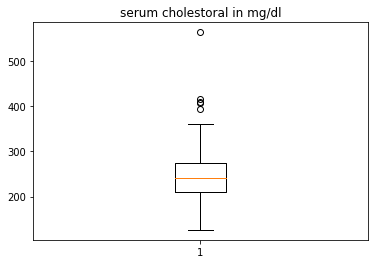

In [25]:
plt.boxplot(df['chol'])
plt.title('serum cholestoral in mg/dl')

In [26]:
Q1=df['chol'].quantile(0.25)
Q3=df['chol'].quantile(0.75)
IQR=Q3-Q1
print("Q1", Q1)
print("Q3", Q3)
print("IQR", IQR)
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Normal Range", lower_bound, "-", upper_bound)

Q1 211.0
Q3 274.5
IQR 63.5
Normal Range 115.75 - 369.75


In [27]:
#estudo dos outliers
z=np.abs(stats.zscore(df['chol']))
lista = list(filter(lambda x: x > 3, list(z)))
lista

[3.2995550358497527, 6.14040093405368, 3.1063002128426827, 3.1449511774440966]

In [28]:
#pelo z-score, apresentamos 4 outliers, conforme mostrado anteriormente

**fbs - fasting blood sugar**

Text(0.5, 1.0, 'fasting blood sugar')

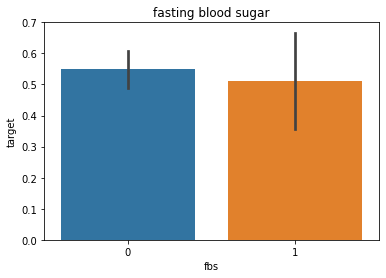

In [29]:
sns.barplot(df['fbs'], y)
plt.title('fasting blood sugar')

**restecg - resting electrocardiographic results**

In [30]:
df['restecg'].unique()

array([0, 1, 2])

Text(0.5, 1.0, 'resting electrocardiographic results')

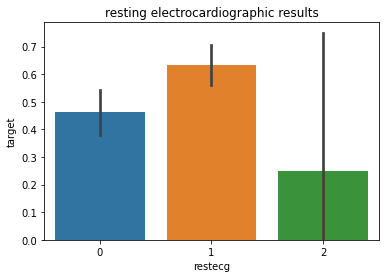

In [31]:
sns.barplot(df['restecg'], y)
plt.title('resting electrocardiographic results')

**thalach - maximum heart rate achieved**

Text(0.5, 1.0, ' maximum heart rate achieved')

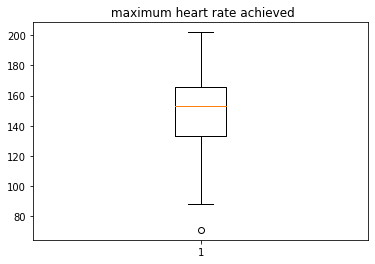

In [32]:
plt.boxplot(df['thalach'])
plt.title(' maximum heart rate achieved')

In [33]:
Q1=df['thalach'].quantile(0.25)
Q3=df['thalach'].quantile(0.75)
IQR=Q3-Q1
print("Q1", Q1)
print("Q3", Q3)
print("IQR", IQR)
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Normal Range", lower_bound, "-", upper_bound)

Q1 133.5
Q3 166.0
IQR 32.5
Normal Range 84.75 - 214.75


In [34]:
#estudo dos outliers
z=np.abs(stats.zscore(df['thalach']))
lista = list(filter(lambda x: x > 3, list(z)))
lista

[3.439267103184409]

In [35]:
#pelo z-score, apresentamos 1 outlier, conforme mostrado anteriormente

**exang - exercise induced angina**

Text(0.5, 1.0, 'exercise induced angina')

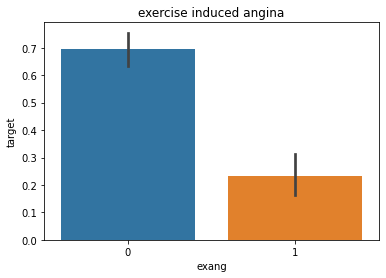

In [36]:
sns.barplot(df['exang'],y)
plt.title('exercise induced angina')

In [37]:
# na maioria dos casos, a angina não é induzida pela prática de exercícios. 

**oldpeak - ST depression induced by exercise relative to rest**

Text(0.5, 1.0, 'ST depression induced by exercise relative to rest')

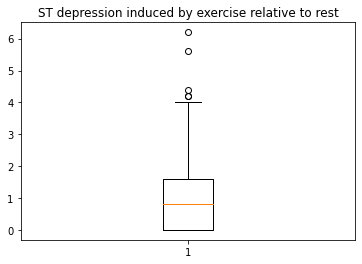

In [38]:
plt.boxplot(df['oldpeak'])
plt.title('ST depression induced by exercise relative to rest')

In [39]:
Q1=df['oldpeak'].quantile(0.25)
Q3=df['oldpeak'].quantile(0.75)
IQR=Q3-Q1
print("Q1", Q1)
print("Q3", Q3)
print("IQR", IQR)
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Normal Range", lower_bound, "-", upper_bound)

Q1 0.0
Q3 1.6
IQR 1.6
Normal Range -2.4000000000000004 - 4.0


In [40]:
#estudo dos outliers
z=np.abs(stats.zscore(df['oldpeak']))
lista = list(filter(lambda x: x > 3, list(z)))
lista

[4.451850726692426, 3.9342333935428453]

In [41]:
#pelo z-score, apresentamos 2 outliers, conforme mostrado anteriormente

**slope - the slope of the peak exercise ST segment**

In [42]:
df['slope'].unique()

array([0, 2, 1])

Text(0.5, 1.0, ' the slope of the peak exercise ST segment')

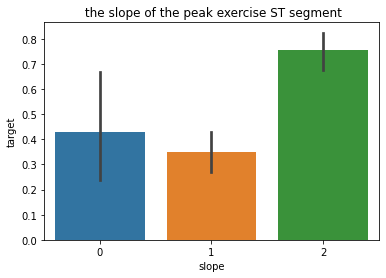

In [43]:
sns.barplot(df['slope'],y)
plt.title(' the slope of the peak exercise ST segment')

In [44]:
# Nota-se que para slope = 2 a chance de apresentar uma doença no coralçao é muito maior

**ca - number of major vessels (0-3) colored by flourosopy**

In [45]:
df['ca'].unique()

array([0, 2, 1, 3, 4])

Text(0.5, 1.0, 'number of major vessels (0-3) colored by flourosopy')

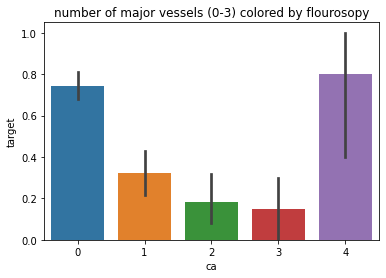

In [46]:
sns.barplot(df['ca'],y)
plt.title('number of major vessels (0-3) colored by flourosopy')

**thal - thalium stress result**

In [47]:
df['thal'].unique()

array([1, 2, 3, 0])

Text(0.5, 1.0, 'Thalium stress result')

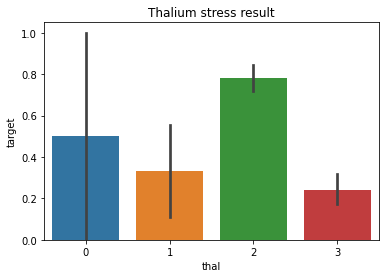

In [48]:
sns.barplot(df['thal'],y)
plt.title('Thalium stress result')

# Train Test Split

In [49]:
X = df.drop(['target'], axis=1)
y = df['target']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 12)

In [51]:
X_train.shape

(242, 13)

In [52]:
y_train.shape

(242,)

In [53]:
X_test.shape

(61, 13)

In [54]:
y_test.shape

(61,)

In [55]:
# Aplica a Normalização (StandardScaler) nos dados (IMPORTANTE QUE NÃO SEJA NOS CATEGÓRICOS)

scaler = StandardScaler()
out_cols
                 
scaler.fit(X_train[out_cols])
X_train = X_train.reset_index().drop('index',axis=1)
X_test = X_test.reset_index().drop('index',axis=1)
y_train = y_train.reset_index().drop('index',axis=1)
y_test = y_test.reset_index().drop('index',axis=1)


X_train[out_cols] = pd.DataFrame(scaler.transform(X_train[out_cols]),columns=out_cols)
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,2.442208,1,0,-0.370126,1.166834,0,0,0.562932,1,-0.849325,2,3,2
1,-0.016343,1,0,-1.191873,-0.140732,0,1,-1.056172,1,1.593386,1,1,3
2,1.159486,1,0,-0.644041,-1.387948,0,1,-0.426520,0,-0.500366,2,0,3
3,1.052592,1,0,-0.205776,0.342062,0,1,-2.000649,1,-0.674846,1,1,3
4,-0.764598,1,2,0.342055,0.221363,0,0,0.293082,0,-0.849325,2,0,2


In [56]:
X_train.shape

(242, 13)

In [57]:
X_test[out_cols] = pd.DataFrame(scaler.transform(X_train[out_cols]),columns=out_cols)
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-5.527538,1,2,-7.238295,-4.925078,0,1,-6.697719,0,-1.590274,2,4,2
1,-5.790341,0,2,-7.283313,-4.951381,0,0,-6.770538,0,0.540740,1,0,3
2,-5.664653,0,1,-7.253301,-4.976471,0,0,-6.742220,0,-1.285843,1,0,2
3,-5.676079,1,0,-7.229291,-4.941669,0,0,-6.813016,1,-1.438059,0,1,2
4,-5.870325,1,0,-7.199279,-4.944097,0,1,-6.709856,1,-1.590274,1,1,3


In [58]:
X_test.shape

(61, 13)

# Seleção do modelo

## Regressão Logística


In [59]:
reglog = LogisticRegression()

reglog.fit(X_train,y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
y_pred = reglog.predict(X_test)
f1 = round(f1_score(y_test, y_pred, average='macro')*100, 2)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred)*100,2)
recall = round(recall_score(y_test, y_pred)*100,2)

print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")

metricas = {}
metricas["LogisticRegression"]={
                            "accuracy":accuracy,
                            "precision":precision,
                            "recall":recall,
                            "f1":f1
                            }


F1 Score: 78.1%
Accuracy Score: 78.69%
Precision Score: 70.73%
Recall Score: 96.67%


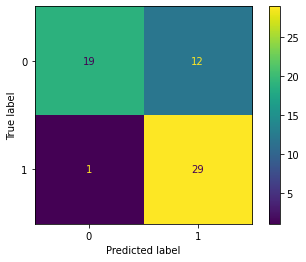

In [61]:
plot_confusion_matrix(reglog, X_test, y_test, values_format='d')  
plt.grid(False)
plt.show()

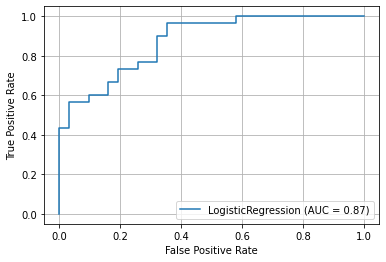

In [62]:
# Curva ROC
plot_roc_curve(reglog, X_test, y_test)  
plt.grid()
plt.show()

##Random Forest Classifier

In [63]:
random = RandomForestClassifier()

random.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
y_pred = random.predict(X_test)
f1 = round(f1_score(y_test, y_pred, average='macro')*100, 2)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred)*100,2)
recall = round(recall_score(y_test, y_pred)*100,2)

print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")


metricas["Random Forest Classifier"]={
                            "accuracy":accuracy,
                            "precision":precision,
                            "recall":recall,
                            "f1":f1
                            }


F1 Score: 81.47%
Accuracy Score: 81.97%
Precision Score: 73.17%
Recall Score: 100.0%


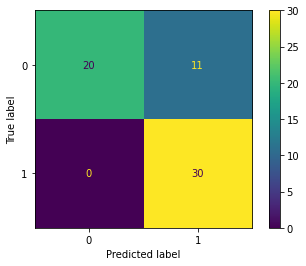

In [65]:
plot_confusion_matrix(random, X_test, y_test, values_format='d')  
plt.grid(False)
plt.show()

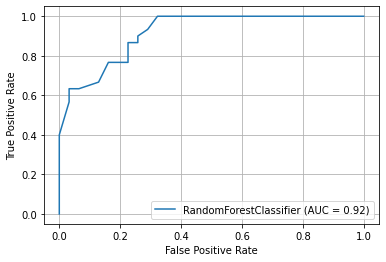

In [66]:
# Curva ROC
plot_roc_curve(random, X_test, y_test)  
plt.grid()
plt.show()

##SVM -  Kernel Linear

In [67]:
svml = SVC(kernel='linear')

svml.fit(X_train, y_train)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
Y_pred = svml.predict(X_test)
f1 = round(f1_score(y_test, y_pred, average='macro')*100, 2)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred)*100,2)
recall = round(recall_score(y_test, y_pred)*100,2)

print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")


metricas["SVM Linear"]={
                            "accuracy":accuracy,
                            "precision":precision,
                            "recall":recall,
                            "f1":f1
                            }

F1 Score: 81.47%
Accuracy Score: 81.97%
Precision Score: 73.17%
Recall Score: 100.0%


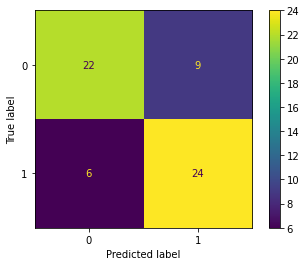

In [69]:
plot_confusion_matrix(svml, X_test, y_test, values_format='d')  
plt.grid(False)
plt.show()

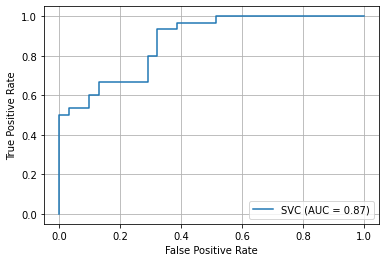

In [70]:
# Curva ROC
plot_roc_curve(svml, X_test, y_test)  
plt.grid()
plt.show()

##SVM - Poly

In [71]:
svmp = SVC(kernel='poly')

svmp.fit(X_train, y_train)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [72]:
Y_pred = svmp.predict(X_test)
f1 = round(f1_score(y_test, y_pred, average='macro')*100, 2)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred)*100,2)
recall = round(recall_score(y_test, y_pred)*100,2)

print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")


metricas["SVM poly"]={
                        "accuracy":accuracy,
                        "precision":precision,
                        "recall":recall,
                        "f1":f1
                            }

F1 Score: 81.47%
Accuracy Score: 81.97%
Precision Score: 73.17%
Recall Score: 100.0%


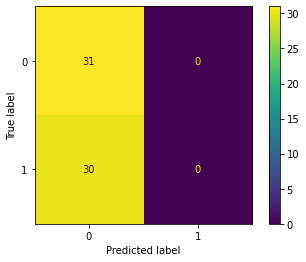

In [73]:
plot_confusion_matrix(svmp, X_test, y_test, values_format='d')  
plt.grid(False)
plt.show()

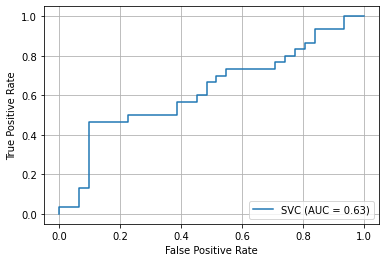

In [74]:
# Curva ROC
plot_roc_curve(svmp, X_test, y_test)  
plt.grid()
plt.show()

##Decision Tree

In [75]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [76]:
Y_pred = dt.predict(X_test)
f1 = round(f1_score(y_test, y_pred, average='macro')*100, 2)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred)*100,2)
recall = round(recall_score(y_test, y_pred)*100,2)

print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")


metricas["Decision Tree"]={
                            "accuracy":accuracy,
                            "precision":precision,
                            "recall":recall,
                            "f1":f1
                            }

F1 Score: 81.47%
Accuracy Score: 81.97%
Precision Score: 73.17%
Recall Score: 100.0%


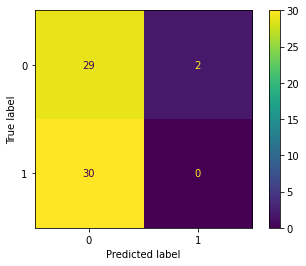

In [77]:
plot_confusion_matrix(dt, X_test, y_test, values_format='d')  
plt.grid(False)
plt.show()

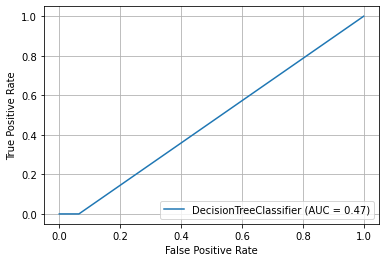

In [78]:
# Curva ROC
plot_roc_curve(dt, X_test, y_test)  
plt.grid()
plt.show()

##Redes Neurais

In [79]:
rn = MLPClassifier()

rn.fit(X_train, y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [80]:
y_pred = rn.predict(X_test)
f1 = round(f1_score(y_test, y_pred, average='macro')*100, 2)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred)*100,2)
recall = round(recall_score(y_test, y_pred)*100,2)

print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")


metricas["Redes Neurais"]={
                            "accuracy":accuracy,
                            "precision":precision,
                            "recall":recall,
                            "f1":f1
                            }

F1 Score: 39.77%
Accuracy Score: 52.46%
Precision Score: 50.85%
Recall Score: 100.0%


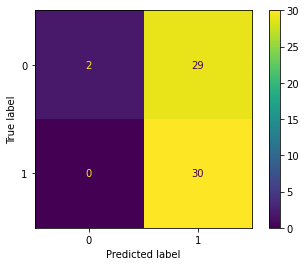

In [81]:
plot_confusion_matrix(rn, X_test, y_test, values_format='d')  
plt.grid(False)
plt.show()

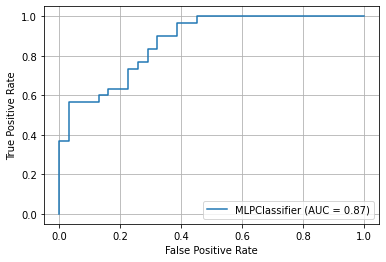

In [82]:
# Curva ROC
plot_roc_curve(rn, X_test, y_test)  
plt.grid()
plt.show()

## XGBoost

In [83]:
xgb = XGBClassifier()

xgb.fit(X_train, y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [84]:
y_pred = xgb.predict(X_test)
f1 = round(f1_score(y_test, y_pred, average='macro')*100, 2)
accuracy = round(accuracy_score(y_test, y_pred)*100,2)
precision = round(precision_score(y_test, y_pred)*100,2)
recall = round(recall_score(y_test, y_pred)*100,2)

print(f"F1 Score: {f1}%")
print(f"Accuracy Score: {accuracy}%")
print(f"Precision Score: {precision}%")
print(f"Recall Score: {recall}%")

metricas["Redes Neurais"]={
                            "accuracy":accuracy,
                            "precision":precision,
                            "recall":recall,
                            "f1":f1
                            }

F1 Score: 78.32%
Accuracy Score: 78.69%
Precision Score: 71.79%
Recall Score: 93.33%


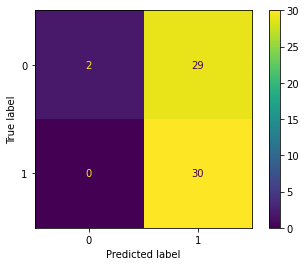

In [85]:
plot_confusion_matrix(rn, X_test, y_test, values_format='d')  
plt.grid(False)
plt.show()

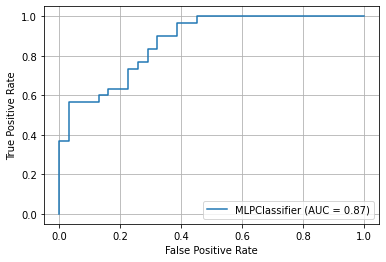

In [86]:
# Curva ROC
plot_roc_curve(rn, X_test, y_test)  
plt.grid()
plt.show()

# PCA

In [90]:
from sklearn.decomposition import PCA

In [91]:
pca = PCA(n_components=2)

In [ ]:
X pca.fit_transform(df)

In [97]:
X = df.drop(['target'], axis=1)
y = df['target']